Import library

In [84]:
import sqlite3 
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [85]:
db_path = "/Users/shangweisong/Desktop/AIAP_Student_score/data/score.db"

conn = sqlite3.connect(db_path)
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)

print("Tables in the database:", tables)

# Load a specific table into a DataFrame

df = pd.read_sql_query("SELECT * FROM score;", conn)  # replace with your table name

# Preview the data
print(df.head())
conn.close

Tables in the database:     name
0  score
   index  number_of_siblings direct_admission     CCA learning_style  \
0      0                   0              Yes  Sports         Visual   
1      1                   2               No  Sports       Auditory   
2      2                   0              Yes    None         Visual   
3      3                   1               No   Clubs       Auditory   
4      4                   0               No  Sports       Auditory   

  student_id  gender tuition  final_test  n_male  n_female   age  \
0     ACN2BE  Female      No        69.0    14.0       2.0  16.0   
1     FGXIIZ  Female      No        47.0     4.0      19.0  16.0   
2     B9AI9F    Male      No        85.0    14.0       2.0  15.0   
3     FEVM1T  Female     Yes        64.0     2.0      20.0  15.0   
4     AXZN2E    Male      No        66.0    24.0       3.0  16.0   

   hours_per_week  attendance_rate sleep_time wake_time  mode_of_transport  \
0            10.0             91.0    

<function Connection.close()>

QUICK LOOK AT DATA WITH DATA WRANGLER

In [86]:
df.head()

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow


In [ ]:
# Remove duplicate data
# # observe if the duplicates are small
# duplicates = df[df.duplicated(subset='student_id', keep=False)]

# print("\nTable of Duplicate Rows Based on 'student_id':")
# print(duplicates)

df_distinct= df.drop_duplicates(subset='student_id', keep = 'first')
print(df_distinct)

In [ ]:
#  observe the number of missing data in each column
missing_values = df_distinct.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

In [ ]:
# drop null cells and lowercase string values
df_cleaned= df_distinct.dropna().applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_cleaned['tuition'] = df_cleaned['tuition'].replace({'y': 'yes', 'n': 'no'})
df_cleaned
print (df_cleaned)

In [ ]:
df_cleaned.head(0)

Finding sleep duration

In [ ]:
# Convert 'sleeptime' and 'waketime' to datetime (using a fixed date to avoid errors)
df_cleaned['sleep_time'] = pd.to_datetime(df_cleaned['sleep_time'], format='%H:%M')
df_cleaned['wake_time'] = pd.to_datetime(df_cleaned['wake_time'], format='%H:%M')

# Adjust wake_time if it's earlier than sleep_time
df_cleaned['wake_time'] = df_cleaned.apply(
    lambda row: row['wake_time'] + pd.Timedelta(days=1) if row['wake_time'] < row['sleep_time'] else row['wake_time'], axis=1
)

# Calculate the difference between wake time and sleep time
df_cleaned['sleep_duration'] = df_cleaned['wake_time'] - df_cleaned['sleep_time']
df_cleaned['sleep_duration_hours'] = df_cleaned['sleep_duration'].dt.total_seconds() / 3600
# Display the DataFrame with sleep duration
print(df_cleaned)


In [92]:
df_processed = df_cleaned.drop(['sleep_duration','index','sleep_time','wake_time','sleep_duration','student_id'], axis= 1)
df_processed.head(0)

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color,sleep_duration_hours


Visualise Distribution if not using data wrangler

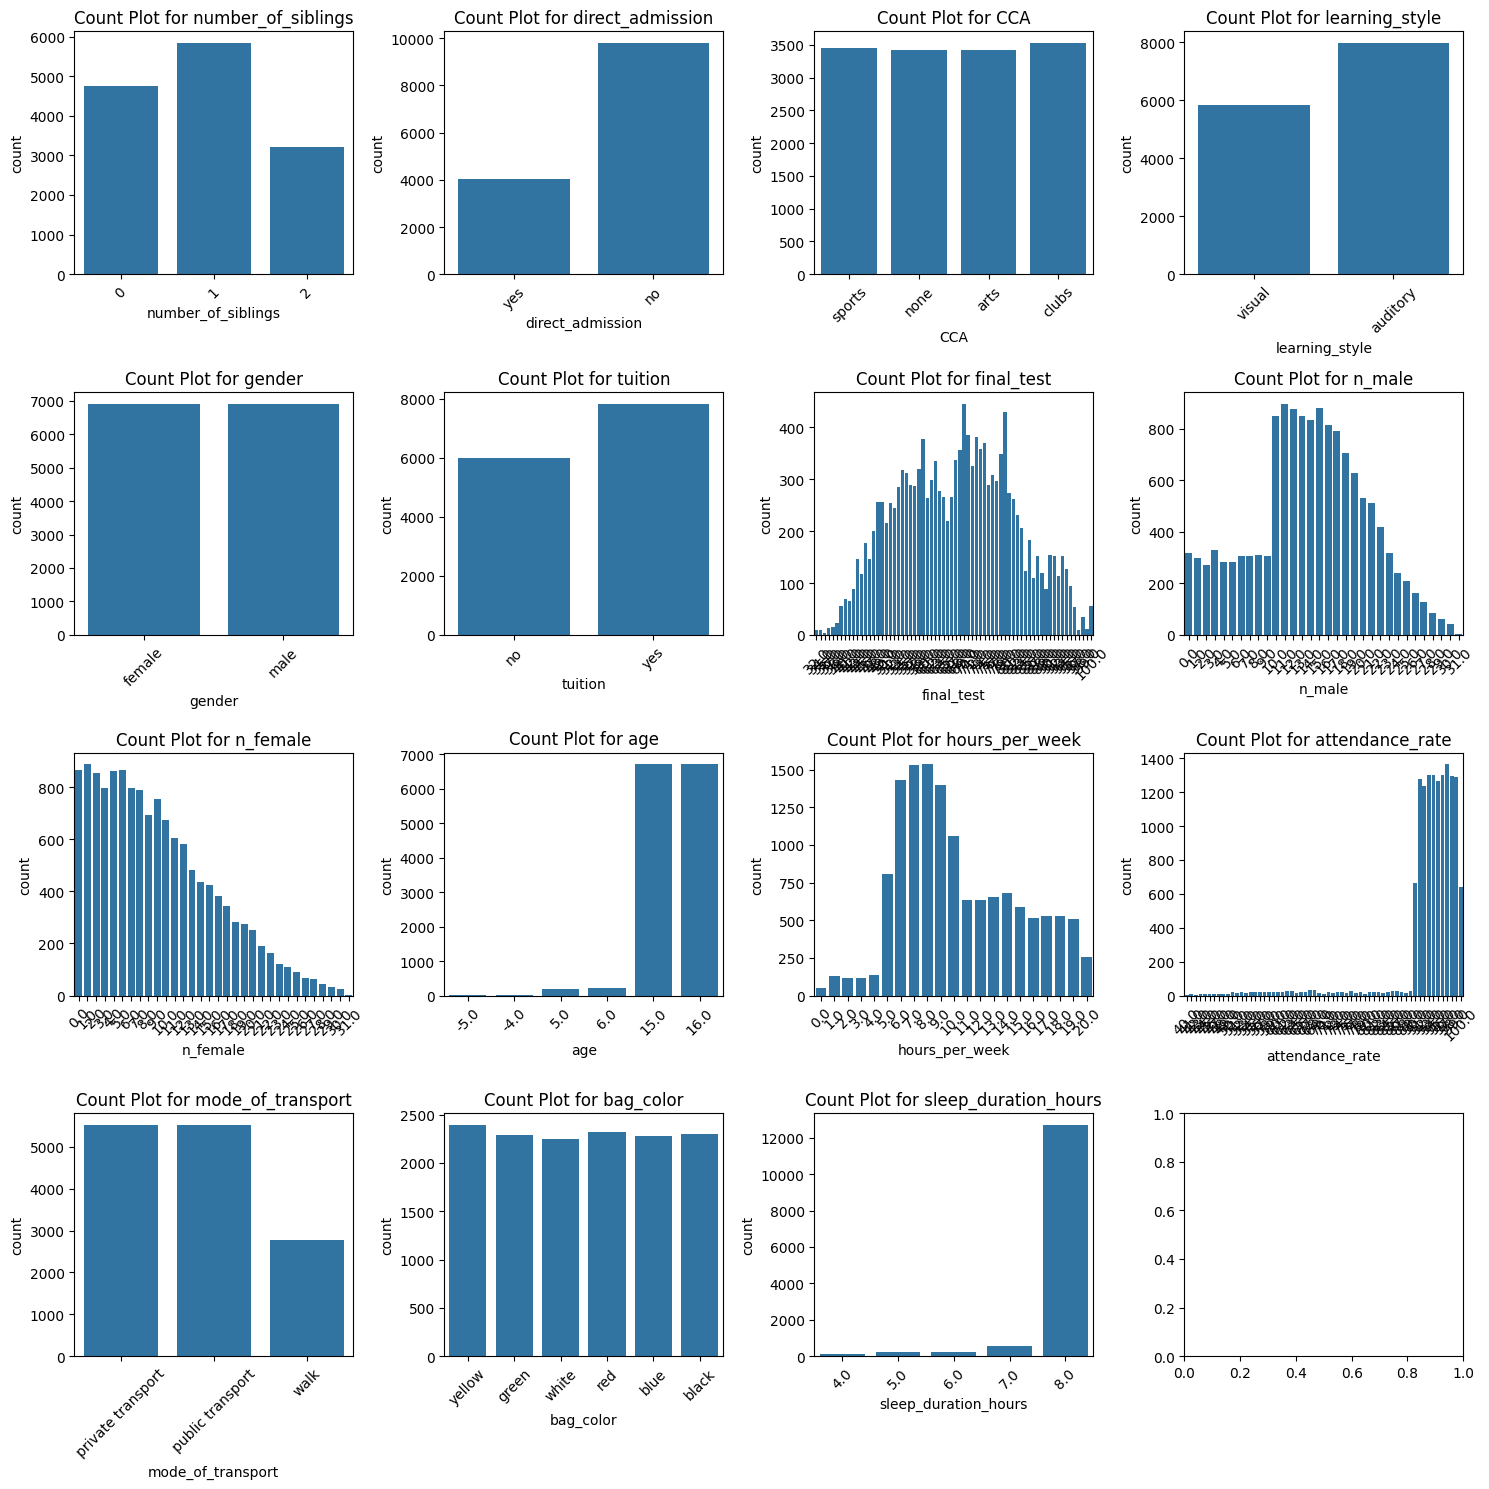

In [93]:
import matplotlib.pyplot as plt

columns_to_plot = df_processed.columns[:16]

# Create a 4x4 grid of subplots (16 total)
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a countplot for each selected column
for i, col in enumerate(columns_to_plot):
    sns.countplot(data=df_processed, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [94]:
df_processed.describe()

,number_of_siblings,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_duration_hours
count,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000
mean,0.888672,67.156467,13.841942,8.951968,15.204861,10.330006,93.280527,7.846644
std,0.751841,13.969046,6.548047,6.682039,1.785378,4.465503,7.948853,0.601722
min,0.000000,32.000000,0.000000,0.000000,-5.000000,0.000000,40.000000,4.000000
25%,0.000000,56.000000,10.000000,4.000000,15.000000,7.000000,92.000000,8.000000
50%,1.000000,68.000000,14.000000,8.000000,15.000000,9.000000,95.000000,8.000000
75%,1.000000,78.000000,18.000000,13.000000,16.000000,14.000000,97.000000,8.000000
max,2.000000,100.000000,31.000000,31.000000,16.000000,20.000000,100.000000,8.000000


One hot encoding and standardisation

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_processed[['age','final_test','n_male','n_female','hours_per_week','attendance_rate','sleep_duration_hours','number_of_siblings']] = scaler.fit_transform(df_processed[['age','final_test','n_male','n_female','hours_per_week','attendance_rate','sleep_duration_hours','number_of_siblings']])

# Step 2: One-hot encode categorical variables 
df_encoded = pd.get_dummies(df_processed, columns=['direct_admission', 'CCA', 'gender', 'learning_style', 'tuition','mode_of_transport','bag_color'], drop_first=True)
bool_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)
df_encoded.head(50)


,number_of_siblings,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_duration_hours,direct_admission_yes,CCA_clubs,...,gender_male,learning_style_visual,tuition_yes,mode_of_transport_public transport,mode_of_transport_walk,bag_color_blue,bag_color_green,bag_color_red,bag_color_white,bag_color_yellow
0,-1.182036,0.131977,0.024139,-1.040434,0.445378,-0.073904,-0.286910,0.254872,1,0,...,0,1,0,0,0,0,0,0,0,1
1,1.478195,-1.442990,-1.503089,1.503792,0.445378,-0.745745,0.090516,0.254872,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-1.182036,1.277409,0.024139,-1.040434,-0.114748,-0.521798,-0.161102,0.254872,1,0,...,1,1,0,0,0,0,0,0,1,0
4,-1.182036,-0.082791,1.551367,-0.890773,0.445378,-0.745745,0.216325,0.254872,0,0,...,1,0,0,1,0,0,0,0,0,1
5,-1.182036,-0.727096,-0.739475,0.456170,-0.114748,0.150043,0.342134,0.254872,0,0,...,0,1,0,0,0,0,0,1,0,0
6,1.478195,0.131977,-0.281307,-0.890773,0.445378,1.045831,-0.035293,0.254872,1,0,...,1,1,0,1,0,0,1,0,0,0
7,-1.182036,0.633104,0.940476,-1.040434,-0.114748,-1.641533,0.467943,0.254872,0,0,...,1,1,0,1,0,0,1,0,0,0
8,-1.182036,-0.727096,0.940476,-0.292132,-0.114748,1.045831,0.593752,0.254872,0,0,...,1,0,0,0,0,0,0,1,0,0
10,1.478195,0.346746,0.940476,-1.339754,0.445378,-0.073904,-0.161102,0.254872,1,0,...,0,1,0,1,0,0,0,0,1,0
11,1.478195,-1.085043,0.176862,-0.292132,0.445378,0.150043,-0.286910,0.254872,0,0,...,0,0,0,1,0,0,0,1,0,0


Ploting heatmap for dimension reduction

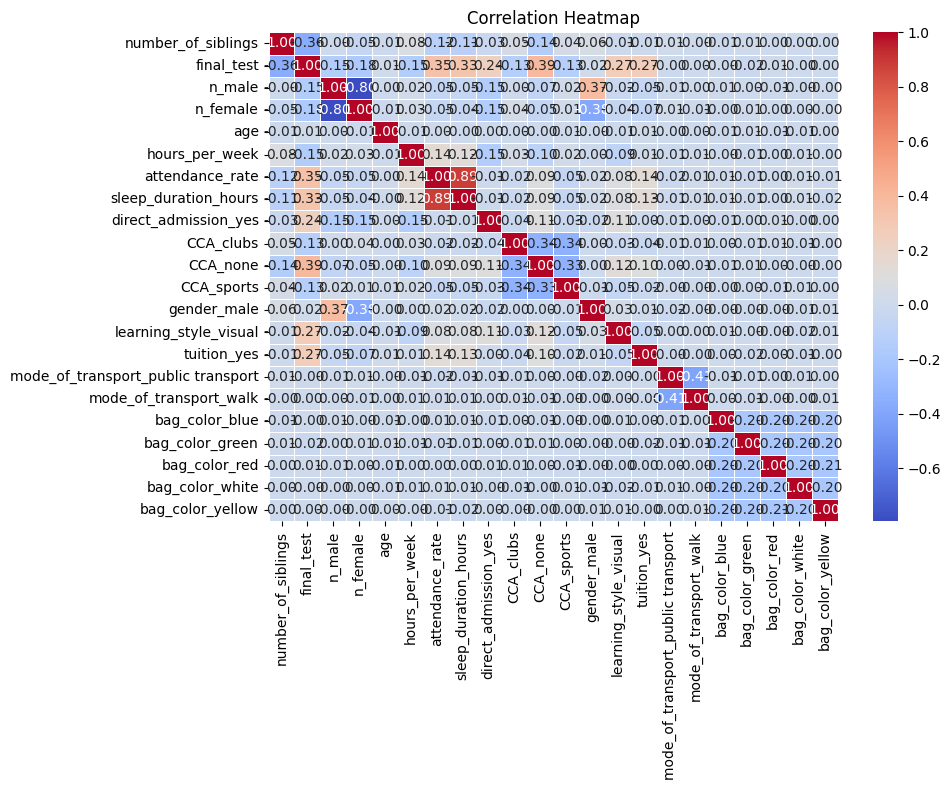

Correlation with 'final_test':
final_test                            1.000000
CCA_none                              0.392835
number_of_siblings                    0.362389
attendance_rate                       0.346237
sleep_duration_hours                  0.325097
learning_style_visual                 0.269777
tuition_yes                           0.267919
direct_admission_yes                  0.238797
n_female                              0.175266
hours_per_week                        0.149444
n_male                                0.145473
CCA_clubs                             0.134534
CCA_sports                            0.130788
bag_color_green                       0.017793
gender_male                           0.015264
age                                   0.012835
bag_color_red                         0.010959
mode_of_transport_public transport    0.004722
bag_color_yellow                      0.003988
bag_color_blue                        0.002002
bag_color_white              

In [96]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

final_test_corr = correlation_matrix['final_test']
# Sort the correlations by absolute value (if you want to prioritize strong correlations)
sorted_corr = final_test_corr.abs().sort_values(ascending=False)

# Print the numerical correlation values
print("Correlation with 'final_test':")
print(sorted_corr)

CHOOSEN PARAMETERS

In [97]:
columns_to_drop = sorted_corr[sorted_corr < 0.1].index

df_ml= df_encoded.drop(columns=columns_to_drop, axis=1)
df_ml.head(10)

,number_of_siblings,final_test,n_male,n_female,hours_per_week,attendance_rate,sleep_duration_hours,direct_admission_yes,CCA_clubs,CCA_none,CCA_sports,learning_style_visual,tuition_yes
0,-1.182036,0.131977,0.024139,-1.040434,-0.073904,-0.286910,0.254872,1,0,0,1,1,0
1,1.478195,-1.442990,-1.503089,1.503792,-0.745745,0.090516,0.254872,0,0,0,1,0,0
2,-1.182036,1.277409,0.024139,-1.040434,-0.521798,-0.161102,0.254872,1,0,1,0,1,0
4,-1.182036,-0.082791,1.551367,-0.890773,-0.745745,0.216325,0.254872,0,0,0,1,0,0
5,-1.182036,-0.727096,-0.739475,0.456170,0.150043,0.342134,0.254872,0,0,0,0,1,0
6,1.478195,0.131977,-0.281307,-0.890773,1.045831,-0.035293,0.254872,1,0,1,0,1,0
7,-1.182036,0.633104,0.940476,-1.040434,-1.641533,0.467943,0.254872,0,0,0,1,1,0
8,-1.182036,-0.727096,0.940476,-0.292132,1.045831,0.593752,0.254872,0,0,0,0,0,0
10,1.478195,0.346746,0.940476,-1.339754,-0.073904,-0.161102,0.254872,1,0,0,0,1,0
11,1.478195,-1.085043,0.176862,-0.292132,0.150043,-0.286910,0.254872,0,0,0,1,0,0


Testing Ml for Choosen features df_ml

In [109]:
X= df_ml.drop(['final_test'], axis=1)
y = df_ml['final_test']

from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor

# Initialize model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.2861660288453434
R-squared: 0.7223661746520857


In [ ]:
# Calculate the variance target variable
variance_final_test = y_test.var()  # Variance of the actual target values
print(f"Variance of 'final_test': {variance_final_test:.3f}")
# Calculate range of the target variable
range_final_test = y_test.max() - y_test.min()
print(f"Range of 'final_test': {range_final_test:.3f}")

Variance of 'final_test': 1.031
Range of 'final_test': 4.868


In [98]:
print(df.info())       # Data types and non-null counts
print(df.describe())   # Summary statistics for numerical columns
print(df.columns)      # List of column names
print(df.dtypes)       # Data types of each column
print(df.isnull().sum())  # Count of missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15900 entries, 0 to 15899
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               15900 non-null  int64  
 1   number_of_siblings  15900 non-null  int64  
 2   direct_admission    15900 non-null  object 
 3   CCA                 15900 non-null  object 
 4   learning_style      15900 non-null  object 
 5   student_id          15900 non-null  object 
 6   gender              15900 non-null  object 
 7   tuition             15900 non-null  object 
 8   final_test          15405 non-null  float64
 9   n_male              15900 non-null  float64
 10  n_female            15900 non-null  float64
 11  age                 15900 non-null  float64
 12  hours_per_week      15900 non-null  float64
 13  attendance_rate     15122 non-null  float64
 14  sleep_time          15900 non-null  object 
 15  wake_time           15900 non-null  object 
 16  mode

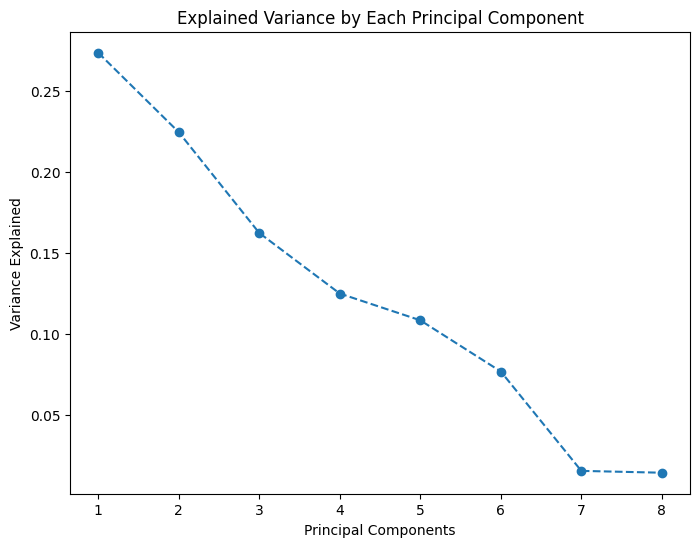

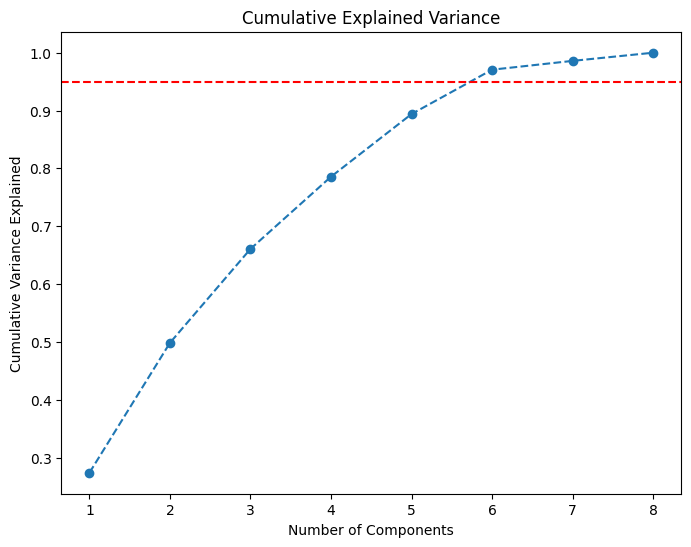

In [99]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
# Assuming df_processed is your DataFrame

# Step 1: Select the numerical columns for PCA
numerical_columns = df_processed.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Standardize the data (important for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_processed[numerical_columns])

# Step 3: Apply PCA to reduce the dimensionality
pca = PCA()
pca.fit(df_scaled)

# Step 4: Plot the explained variance to see how much each component explains
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(numerical_columns) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

# Step 5: Decide the number of components to keep (e.g., 95% of the variance)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(numerical_columns) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.95, color='r', linestyle='--')  # Show where 95% variance is explained
plt.show()

# Step 6: Transform the data into the principal components (keep enough components to explain 95% variance)
n_components = next(i for i, v in enumerate(cumulative_variance) if v >= 0.95) + 1
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

# Step 7: Convert the PCA components back into a DataFrame (optional)
df_pca_df = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Step 8: Optionally, concatenate the principal components with other data
# df_final = pd.concat([df_processed, df_pca_df], axis=1)

In [100]:

# # Histogram of a specific numeric column
# df['column_name'].hist()
# plt.show()

# # Pairplot for numerical features
# sns.pairplot(df)
# plt.show()